## Analyzing the Best Markets to Advertise In 

This notebook is intended to find out the two best markets to advertise an e-learning company products in.

The company offers courses on programming - most are on web and mobile development, but there is also courses which cover other domains, like data science, game development, etc.

<hr>

<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<hr>

<h2>Loading Dataset</h2>

To analyze the markets, we will deal with data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969).

freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400k followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [2]:
rNC_survey = pd.read_csv(r'2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<hr>

<h2>Understanding the Data</h2>

##### Analysing number of rows and columns 

In [3]:
rNC_survey.shape

(18175, 136)

##### Print first five rows 

In [4]:
rNC_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr>

<h2>Checking for Sample Representativity</h2>

In this section we will check if the sample we have (the freeCodeCamp's 2017 New Coder Survey) is representative for our population of interest. 

The `JobRoleInterest` column describer for every participant the role(s) they'd be interested in working. We will use this column as a proxy to understand who will be interested in certain courses: if a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain.

In [5]:
rNC_survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                 11.770595
  Front-End Web Developer                                                                                                                                                                                                                                 6.435927
  Data Scientist                                                                                                                                                                                                                                          2.173913
Back-End Web Developer                                                                                                                                                                                                         

In [6]:
## Drop the nulls
no_nulls = rNC_survey['JobRoleInterest'].dropna()
## Count how many subjects people are interested in
counts = (no_nulls.astype(str)
          .str.split(',').map(len))

## Print frequency table of counts
counts.value_counts(normalize=True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

In [7]:
rNC_survey['JobRoleInterest'].unique()

array([nan, 'Full-Stack Web Developer',
       '  Front-End Web Developer, Back-End Web Developer,   DevOps / SysAdmin,   Mobile Developer, Full-Stack Web Developer',
       ...,
       '  Data Scientist, Game Developer,   Quality Assurance Engineer',
       'Back-End Web Developer, Data Engineer,   Data Scientist,   DevOps / SysAdmin',
       '  DevOps / SysAdmin,   Mobile Developer,   Product Manager, Game Developer,   Front-End Web Developer, Data Engineer,   Quality Assurance Engineer,   User Experience Designer, Back-End Web Developer,   Data Scientist, Full-Stack Web Developer, Information Security, IT specialist '],
      dtype=object)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


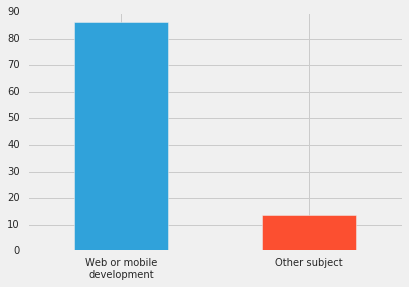

In [8]:
## Find out how many people are interested in our main domains:
# web and mobile development
web_or_mobile = (no_nulls.str
                 .contains('Web Developer|Mobile Developer'))

## Create frequency table
freq_table = web_or_mobile.value_counts(normalize=True)*100
print(freq_table)

## Create a bar plot to show this difference
plt.style.use('fivethirtyeight')

freq_table.plot(kind='bar', rot=0)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject']);

From the frequency table above, we can conclude that:

- People can be interested in more than on subject
- Only ~31.7% of people in the survey are completely sure about te domain they want to study/work. The vast majority have mixed interests
- There are a lot of observation points who are interested in Web or mobile development (~86%)

Since we are interested in advertising products to people that are interested in various subjects, but mostly on web or mobile development, **we can consider that this sample is representative of our population of interest**

<hr>

<h2>Analysis</h2>

We are basically interested in answering the following 3 questions:

- Where are the new coders located
- What are the locations with the greatest number of new coders
- How much money new coders are willing to spend on learning

<h4>Location and density of new coders</h4>

Our dataset offers information about location in a country level granularity. There are 2 columns related to location information:
- `CountryCitizen`: this column describes the country of origin of each participant
- `CountryLive`: variable describes what country each participant lives in (which may be different than the origin country)

In this analysis, we will work with the `CountryLive` variable since we are interested where people actually live at the moment when we run the ads. In other words, we are interested where people are located, not where they were born

In [9]:
## Drop all the rows where participants did not answer
# what role they are interested in
not_nulls_df = rNC_survey[rNC_survey['JobRoleInterest'].notnull()]

## Generate absolute frequency table for the countrylive columns
absolute_freq = pd.DataFrame(not_nulls_df['CountryLive']
                             .value_counts())

## Generate relative frequency table
relative_freq = pd.DataFrame((not_nulls_df['CountryLive']
                              .value_counts(normalize=True)
                              *100))

frequency_table = pd.concat([absolute_freq,
                             relative_freq], axis=1)

frequency_table.columns = ['Absolute Frequency', 
                           'Relative Frequency']
frequency_table

,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The above frequency tables show that:
- USA is where most of the participants in the survey live (45.7%)
- India is the second country whit 7.7% of total correspondets

<h4>Spending Money for Learning</h4>


The `MoneyForLearning` column describes in America dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason **we are interested in finding out how much money each student spends _per month_**

We will narrow down our analysis to the following 4 countries: US, India, UK and Canada. We do this for 2 reasons:

1. These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each
2. Our courses are written in English, and English is an official language in all these 4 countries. The more people that know English, the better our chances to target the right people with our ads

In [10]:
## Create column that describes the amount of money spent per month
tNC_survey = not_nulls_df.copy()

## Some entries in the MonthsProgramming are 0. Replace them with 1
to_replace = tNC_survey['MonthsProgramming']==0
tNC_survey['MonthsProgramming'] = np.where(to_replace, 1,
                                           tNC_survey['MonthsProgramming'])

tNC_survey['MONEY_PER_MONTH'] = (tNC_survey['MoneyForLearning'] /
                                 tNC_survey['MonthsProgramming'])

## Number of nulls in money per month
print('Money per month column has',
      tNC_survey['MONEY_PER_MONTH'].isnull().sum(),
      'nulls')

print('Dropping these null entrie', end='...')
tNC_survey = tNC_survey[tNC_survey['MONEY_PER_MONTH'].notnull()]
print('Ok')

## Take into account only the 4 countries mentioned above
countries = ['United States of America', 'India',
             'United Kingdom', 'Canada']

tNC_survey = tNC_survey[tNC_survey['CountryLive'].isin(countries)]

## Group by the countrylive column and display the mean
(tNC_survey.groupby('CountryLive')['MONEY_PER_MONTH']
 .mean().sort_values(ascending=False))

Money per month column has 675 nulls
Dropping these null entrie...Ok


CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MONEY_PER_MONTH, dtype: float64

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


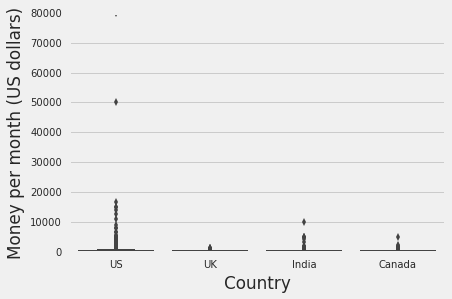

In [11]:
## Analysing outliers
sns.boxplot(y = tNC_survey['MONEY_PER_MONTH'], 
            x = tNC_survey['CountryLive'])

plt.ylabel('Money per month (US dollars)');
plt.xlabel('Country');
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']);

We can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month.

In [12]:
## Remove every value that goes over $20k per month
tNC_survey = tNC_survey[tNC_survey['MONEY_PER_MONTH']<=20000]

## Group by the countrylive column and display the mean
(tNC_survey.groupby('CountryLive')['MONEY_PER_MONTH']
 .mean().sort_values(ascending=False))

CountryLive
United States of America    183.800110
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MONEY_PER_MONTH, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


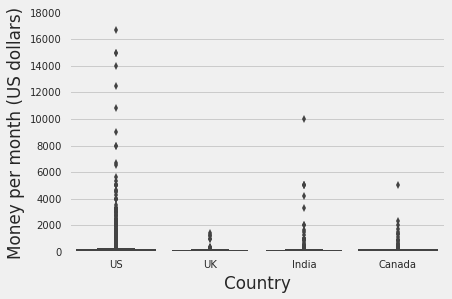

In [13]:
## Analysing outliers
sns.boxplot(y = tNC_survey['MONEY_PER_MONTH'], 
            x = tNC_survey['CountryLive'])

plt.ylabel('Money per month (US dollars)');
plt.xlabel('Country');
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']);

We can still see some outliers. Let's examine them below

In [22]:
## USA
tNC_survey[(tNC_survey['MONEY_PER_MONTH']>=6000)&
           (tNC_survey['CountryLive']=='United States of America')]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MONEY_PER_MONTH
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

In [15]:
to_drop = tNC_survey[(tNC_survey['MONEY_PER_MONTH']>=6000)&
                     (tNC_survey['CountryLive']=='United States of America')&
                     (tNC_survey['AttendedBootcamp']==0)]

tNC_survey = tNC_survey.drop(to_drop.index)

In [16]:
## India
tNC_survey[(tNC_survey['MONEY_PER_MONTH']>=2500)&
           (tNC_survey['CountryLive']=='India')]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MONEY_PER_MONTH
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


None of the 6 outliers from India attended a bootcamp (type of training that is usually pretty expensive). Therefore, we will drop these 6 cases

In [17]:
to_drop = tNC_survey[(tNC_survey['CountryLive']=='India')&
                     (tNC_survey['MONEY_PER_MONTH']>=2500)&
                     (tNC_survey['AttendedBootcamp']==0)]

tNC_survey = tNC_survey.drop(to_drop.index)

In [19]:
## Canada
tNC_survey[(tNC_survey['CountryLive']=='Canada')&
           (tNC_survey['MONEY_PER_MONTH']>= 4500)]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MONEY_PER_MONTH
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This participant attended a bootcamp so it is not sure if these a mistyped dataset or not. We will leave it there, just to not lose any information

In [20]:
## Remove every value that goes over $20k per month
tNC_survey = tNC_survey[tNC_survey['MONEY_PER_MONTH']<=20000]

## Group by the countrylive column and display the mean
(tNC_survey.groupby('CountryLive')['MONEY_PER_MONTH']
 .mean().sort_values(ascending=False))

CountryLive
United States of America    160.532509
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
Name: MONEY_PER_MONTH, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


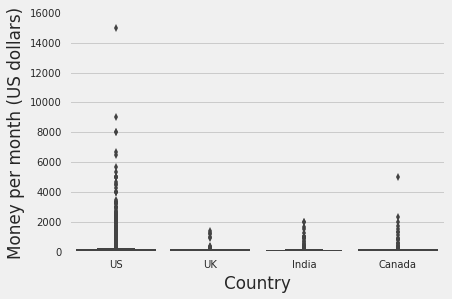

In [21]:
## Analysing outliers
sns.boxplot(y = tNC_survey['MONEY_PER_MONTH'], 
            x = tNC_survey['CountryLive'])

plt.ylabel('Money per month (US dollars)');
plt.xlabel('Country');
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']);

<hr>

<h2>Choosing the best 2 markets</h2>

It is clear that US is the best market to advertise, since people are willing to pay ~\$160 for courses, a value way above our prices ($59 per month). In addition to that, most of new coders come from this country.

However, to choose the second best market to advertise, we need to do a further analysis and compute how much money the total market represents

In [27]:
## Canada
people_canada = len(tNC_survey['CountryLive']=='Canada')
money_per_month_per_people_canada = ((tNC_survey.groupby('CountryLive')
                                      ['MONEY_PER_MONTH']
                                      .mean().sort_values(ascending=False))
                                     ['Canada'])

canada_market = people_canada*money_per_month_per_people_canada

## India
people_india = len(tNC_survey['CountryLive']=='India')
money_per_month_per_people_india = ((tNC_survey.groupby('CountryLive')
                                      ['MONEY_PER_MONTH']
                                      .mean().sort_values(ascending=False))
                                     ['India'])

india_market = people_india*money_per_month_per_people_india

## UK
people_uk = len(tNC_survey['CountryLive']=='United Kingdom')
money_per_month_per_people_uk = ((tNC_survey.groupby('CountryLive')
                                  ['MONEY_PER_MONTH']
                                  .mean().sort_values(ascending=False))
                                 ['United Kingdom'])

uk_market = people_uk*money_per_month_per_people_uk
print('UK:', uk_market)
print('India:', india_market)
print('Canada:', canada_market)

UK: 177675.39716730083
India: 256590.6928838261
Canada: 442919.7697717121


From the analysis above, we can see that Canada has a higher market value than India and UK. However, it is important to note that this is a finding taken from a sample. We do not know if the number of participants in each country is representative or not. In other words, we do not know if the number of people that participated in the survey is biased (e.g. number of participants in Canada may be extremely high while in India was extremely low - much more people in India can buy our courses but did not participate in the survey).

Therefore, we cannot make a crystal clear conclusion ab